# ANOVA

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from scipy import stats
from scipy import special

Simply speaking, the **Analysis of Variance** (ANOVA) is a technique of comparing means of multiple$(\geq 3)$ populations, the name derives from the way how calculations are performed.

For example, a common hypotheses of ANOVA are

$$
H_0:\quad μ_1=μ_2=μ_3=⋅s=μ_n\\
H_1:\quad \text{At least two means differ}
$$

The first doubt pops up in mind: why aren't we using same old $t$-tests such that

$$
H_0: μ_1=μ_2 \qquad H_0: μ_1=μ_3 \qquad H_0: μ_1=μ_4 \qquad H_0:\quad μ_2=μ_3\quad⋅s\\
H_1: μ_1\neqμ_2 \qquad H_1: μ_1\neqμ_3\qquad  H_1:μ_1\neqμ_4 \qquad H_1:\quad μ_2\neqμ_3\quad⋅s\\
$$
and so on so forth, till exhaustion of all pairwise combination.

Apparently, the number of $t$-tests will be as large as ${n \choose 2} $ where $n$ is the number of populations. If there are $5$ populations, then we have to test ${5 \choose 2}=10$ pairs. With $95\%$ confidence level, $10$ $t$-tests would cut back confidence level dramatically to $95\%^{10}=59.8\%$, which also means the probability of _type I_ error would be around $40\%$.

A sidenote, econometric ANOVA is a standard practice that all statistical packages automatically print, however the terminologies in statistics are peculiar to econometric practioners, but still semantically sensible that will be clarified in later discussion.

# One-Way Analysis of Variance </font>

If samples are independently drawn from populations, the technique of ANOVA is called **One-Way ANOVA**. The statistic that measures the proximity of the sample means to each other is called **sum of squares for treatments** (SST). The terminology _treatment_ was introduced in 1920s when conducting ANOVA on different treatments of fertilisers for testing potential yields. For instance, an agronomist can sample three different corn yields applied with three different fertilisers. 

The sum of squares for treatments (SST) represents the **between-treatment variation**, the mathematical form is
$$
SST=\sum_{i=1}^kn_i(\bar{x}_i-\bar{\bar{x}})^2
$$
where $n_i$ is the sample size of treatments $i$, $\bar{\bar{x}}$ is the grand mean, i.e. the _mean of the sample means_, $k$ is the number of treatments.

There are also **within-treatments variations** which is denoted by **sum of squares for error** (SSE), it measures the deviation of all observations from its sample mean. 
$$
SSE=\sum_{i=1}^k\sum_{j=1}^{n_i}(x_{ij}-\bar{x}_i)^2=\sum_{j=1}^{n_1}(x_{j1}-\bar{x}_1)^2+\sum_{j=1}^{n_2}(x_{j2}-\bar{x}_2)^2+⋅s+\sum_{j=1}^{n_k}(x_{jk}-\bar{x}_k)^2
$$
If we divide $SSE$ by $(n_i-1)$, i.e. the degree of freedom of each sample, $SSE$ can be rewritten more consicely as
$$
SSE =(n_1-1)s_1^2+(n_2-1)s_2^2+⋅s+(n_k-1)s_k^2
$$
where $s_i^2$ is the sample variance of sample $i$.

In order to construct $F$-statistic, we need to introduce two more statistics, the first one is **Mean Square for Treatments** (MST)
$$
MST=\frac{SST}{k-1}
$$
And the second one is **Mean Square for Error** (MSE)
$$
MSE=\frac{SSE}{n-k}
$$
Join them together, an $F$-statistic is constructed
$$
F=\frac{MST}{MSE}
$$

There are three assumptions for an ANOVA test to be valid.
<ol>
<li><i>Each sample is independent to each other.</i></li>
<li><i>Each sample is drawn from a normally distributed population.</i></li>
<li><i>Population standard deviation are homoskedastic, i.e. constant variance.</i></li>
</ol>
Though in practice you might frequently encounter violation of the assumptions, you should be fully aware of the potentially misleading interpretation of the test results.

If $SST$ is large, then so is $MST$, more likely to produce a larger $F$-statistic, then a higher probability to reject null hypothesis, the rejection rule is
$$
F>F_{\alpha, k-1, n-k}
$$


Critical value $F_{\alpha, k-1, n-k}$ can be returned by ```scipy.stats.f.ppf()```. For instance, the number of treatment is $4$, sum of sample sizes is $342$, with $95\%$ confidence level the crtical value is 

In [7]:
stats.f.ppf(.95, 3, 328)

2.6321415117354894

The widely-known variance decomposition equation is 
$$
SS(Total)=SST+SSE
$$
Mathematically
$$
\sum_{i=1}^k \sum_{j=1}^{n_i}(x_{ij}-\bar{\bar{x}})^2= \sum_{i=1}^kn_i(\bar{x}_i-\bar{\bar{x}})^2+(n_1-1)s_1^2+(n_2-1)s_2^2+⋅s+(n_k-1)s_k^2
$$

## An Example of Population Height

Here is a simple example, we will use three samples of male heights to perform an ANOVA analysis. The hypotheses are
$$
H_0: μ_1=μ_2=μ_3\\
H_1: \text{At least two means differ}\\
$$

In [9]:
df = pd.read_excel('data/heights.xlsx')
df.head()

,Japanese,Dutch,Danish
0,161.783130,187.726286,174.746213
1,145.329934,179.338741,174.133579
2,174.569597,176.566656,178.966745
3,160.003162,184.570245,179.335222
4,162.242898,184.056181,167.497992


Here are ANOVA formulae typed in a verbatim manner.

In [10]:
dutch_mean = df['Dutch'].mean()
japanese_mean = df['Japanese'].mean()
danish_mean = df['Danish'].mean()
grand_mean = (dutch_mean+japanese_mean+danish_mean)/3

SST = len(df['Japanese'])*(japanese_mean-grand_mean)**2\
      +len(df['Dutch'])*(dutch_mean-grand_mean)**2\
      +len(df['Danish'])*(danish_mean-grand_mean)**2
MST = SST/2

SSE = (len(df['Japanese'])-1)*df['Japanese'].var(ddof=1)\
      +(len(df['Dutch'])-1)*df['Dutch'].var(ddof=1)\
      +(len(df['Danish'])-1)*df['Danish'].var(ddof=1)
n = len(df['Japanese']) + len(df['Dutch']) + len(df['Danish'])
k = 3
MSE = SSE/(n-k)

F = MST/MSE
print('F-statistic: {}'.format(F))
print('p-value: {}'.format(1 - stats.f.cdf(F, 2, n-k)))

F-statistic: 37.96057544749984
p-value: 2.3363533330211794e-12


The test results favours the alternative hypothesis overwhelmingly. 

Before we close the case, let's exam the sample variance.

In [11]:
print('Japanese sample variance: {}'.format(df['Japanese'].var(ddof=1)))
print('Danish sample variance: {}'.format(df['Danish'].var(ddof=1)))
print('Dutch sample variance: {}'.format(df['Dutch'].var(ddof=1)))

Japanese sample variance: 145.93369676074872
Danish sample variance: 20.108195066929262
Dutch sample variance: 15.844843124694973


Apparently they violate on of assumptions of ANOVA, therefore cautious must be taken when interpreting the results, though we firmly know the mean heights in these three countries are different. 

## A Simulation View of Factors That Affects $F$-Statistic

Rather than stating that the $F$-tests might be invalid due to violation of critial assumptions, we'll step further to generate simulations to show how various parameters affect $F$-statistics.

The plotting codes are messy, thus hidden in the ```plot_material.anova_plot()```, there 9 groups of charts, e.g. titled as 'Simulation X', each group has a two axes surrounded by a black frame.

We will repetitively draw samples from three populations, each with its own parameters $μ$, $σ$ and $N$, i.e. population mean, population variance and sample size. Each draw can be computed an $F$-statistic, we perform this simuation in a loop of $1000$ rounds, then we plot the fequency distribution of $F$-statistic on the upper axes, and the $p$-value on the lower axes. 

And the red vertical line is the critical value of $F$-statistic, any test results fall to the right-side of the red line shall conclude a rejection to the null hypothesis.

For instance, the simulation $1$ has $μ_1=3, μ_2=6, μ_3 = 9$, it surely indicate a large $F$-statistic, because larger $MST$, however we could still see yet a smaller amount of $F$'s that fall short than critical value. The distributions of corresponding p-values are also plotted under the $F$-statistic distribution. 

The simulation $2$ has $μ_1=3, μ_2=3.1, μ_3 = 2.9$, unless the standard deviation are dominantly trivial, we won't expect a high chance of rejecting null hypothesis, and that's also what the chart shows.

The difference between simulation $2$ and $3$ is the $σ$, apparently the latter one violates the assumption of homoskedasticity, and the $σ$'s mainly are larger than Simulation $1$, thus it pushes more distributions of $F$-statistic to the left side of $F_c$, i.e. fail to reject null.

The simulation $4$ complies with assumption of homoskedasticity, and due to variaous $μ$'s, presumably we would expect a higher volume of rejection of null hypothesis. Visually, yet a large amount of tests fail to reject, possibly due to relative larger standard deviations.

The simulation $5$ and $6$ privide some interesting insight, when the sample size are small such as $n=10$ and relatively large $σ$ would result in a predominant amout of false negative. The straightforward remedy is to increase the sample size as in the simulation $6$.

You can experiment on parameters of simulation $7$, $8$ and $9$. 

## LSD Confidence Intervals

If you have rejected the null hypothesis, but still need further investigation into which treatments deviate from the rest, you need one technique to identify the source of discrepancy. Here's the example of the technique.

The same height example, there is one more column of Finnish in the sheet 2. Let's import the sheet 2.

In [14]:
df2 = pd.read_excel('data/heights.xlsx', 'Sheet2')
df2.head()

,Japanese,Dutch,Danish,Finnish
0,161.783130,187.726286,174.746213,175.855378
1,145.329934,179.338741,174.133579,175.513979
2,174.569597,176.566656,178.966745,173.363995
3,160.003162,184.570245,179.335222,178.515200
4,162.242898,184.056181,167.497992,173.108095


The method we are going to introduce is called **Fisher's Least Significant Difference** (LSD), mathematically as 
$$
LSD= t_{\alpha/2}\sqrt{MSE\bigg(\frac{1}{n_i}+\frac{1}{n_j}\bigg)}
$$
where degree of freedom is $n_1+n_2-2$, and the confidence interval estimator of mean difference is
$$
(\bar{x}_i-\bar{x}_j)\pm t_{\alpha/2}\sqrt{MSE\bigg(\frac{1}{n_i}+\frac{1}{n_j}\bigg)}
$$

First, calculate the $MSE$.

In [15]:
dutch_mean = df2['Dutch'].mean()
japanese_mean = df2['Japanese'].mean()
danish_mean = df2['Danish'].mean()
finnish_mean = df2['Finnish'].mean()
grand_mean = (dutch_mean + japanese_mean + danish_mean + finnish_mean) / 4

SSE = (len(df2['Japanese'])-1)*df2['Japanese'].var(ddof=1)\
    +(len(df2['Dutch'])-1)*df2['Dutch'].var(ddof=1)\
    +(len(df2['Danish'])-1)*df2['Danish'].var(ddof=1)\
    +(len(df2['Finnish'])-1)*df2['Finnish'].var(ddof=1)

n = len(df2['Japanese']) + len(df2['Dutch']) + len(df2['Danish']) + len(
    df2['Finnish'])
k = 4
MSE = SSE / (n - k)


The $LSD$ statistic are intended for each pair of treatments.

$4$ groups means there are $\binom{4}{2}=6$ pairs to test. Let's write a simple function of $LSD$.

In [16]:
def lsd(sig_level, MSE, n1, n2):
    t = stats.t.ppf(1-sig_level/2, n1+n2-2)
    return t*np.sqrt(MSE*(1/n1+1/n2))

In [17]:
jadu = japanese_mean - dutch_mean
jada = japanese_mean - danish_mean
jafi = japanese_mean - finnish_mean
duda = dutch_mean - danish_mean
dufi = dutch_mean - finnish_mean
dafi = danish_mean - finnish_mean

jadu_lsd_low = jadu - lsd(.05, MSE, len(df2['Japanese']), len(df2['Dutch']))
jadu_lsd_high = jadu + lsd(.05, MSE, len(df2['Japanese']), len(df2['Dutch']))

jada_lsd_low = jada - lsd(.05, MSE, len(df2['Japanese']), len(df2['Danish']))
jada_lsd_high = jada + lsd(.05, MSE, len(df2['Japanese']), len(df2['Danish']))

jafi_lsd_low = jafi - lsd(.05, MSE, len(df2['Japanese']), len(df2['Finnish']))
jafi_lsd_high = jafi + lsd(.05, MSE, len(df2['Japanese']), len(df2['Finnish']))

duda_lsd_low = duda - lsd(.05, MSE, len(df2['Dutch']), len(df2['Danish']))
duda_lsd_high = duda + lsd(.05, MSE, len(df2['Dutch']), len(df2['Danish']))

dufi_lsd_low = dufi - lsd(.05, MSE, len(df2['Dutch']), len(df2['Finnish']))
dufi_lsd_high = dufi + lsd(.05, MSE, len(df2['Dutch']), len(df2['Finnish']))

dafi_lsd_low = dafi - lsd(.05, MSE, len(df2['Danish']), len(df2['Finnish']))
dafi_lsd_high = dafi + lsd(.05, MSE, len(df2['Danish']), len(df2['Finnish']))

print('Comparison, Point Estimate, Lower Bound, Upper Bound')
print('Japanese - Dutch   : {:.4f},    {:.4f},     {:.4f}'.format(
    jadu, jadu_lsd_low, jadu_lsd_high))
print('Japanese - Danish  : {:.4f},    {:.4f},     {:.4f}'.format(
    jada, jada_lsd_low, jada_lsd_high))
print('Japanese - Finnish : {:.4f},    {:.4f},     {:.4f}'.format(
    jafi, jafi_lsd_low, jafi_lsd_high))
print('Dutch - Danish     : {:.4f},       {:.4f},       {:.4f}'.format(
    duda, duda_lsd_low, duda_lsd_high))
print('Dutch - Finnish    : {:.4f},       {:.4f},       {:.4f}'.format(
    dufi, dufi_lsd_low, dufi_lsd_high))
print('Danish - Finnish   : {:.4f},    {:.4f},      {:.4f}'.format(
    dafi, dafi_lsd_low, dafi_lsd_high))


Comparison, Point Estimate, Lower Bound, Upper Bound
Japanese - Dutch   : -17.7116,    -21.3998,     -14.0233
Japanese - Danish  : -12.2196,    -15.9078,     -8.5313
Japanese - Finnish : -12.8530,    -16.5413,     -9.1648
Dutch - Danish     : 5.4920,       1.8038,       9.1803
Dutch - Finnish    : 4.8585,       1.1703,       8.5468
Danish - Finnish   : -0.6335,    -4.3217,      3.0548


Point estimate is straightforward to interprete, if the estimate is further away from $0$, we have stronger evidence that two sample means differ. 

But to give a clear statistical inference with $\alpha$ significance level, we should look at confidence interval. If the interval excludes $0$, we could conclude a rejection of $μ_i=μ_j$. In our example, the only fail to rejection is between Danish and Finnish, it means their male heights are largely indifferentiable.

Therefore we conclude that the $MST$ is mostly contributed by Japanese compared to other countries.

# Chi-Squared Goodness-of-Fit Test

This is the last topic of the this tutorial session. Let's walk through an example, then you will be able to grasp the essence of **chi-squared goodness-of-fit test**.

There are three marksman, who are competing shooting beer bottles hanging on a tree $300m$ away, according to their historical records. Here is their hitting rates.

<table style="width:30%; text-align:center;font-size: 120%">
  <tr>
    <th>Marksman</th>
    <th>Hitting Rate</th>
  </tr>
  <tr>
    <td>A</td>
    <td>$24\%$</td>
  </tr>
  <tr>
    <td>B</td>
    <td>$40\%$</td>
  </tr>
   <tr>
    <td>C</td>
    <td>$36\%$</td>
  </tr>
</table>

Apparently $24\%+40\%+36\%=1$, which is a feature of **multinomial experiment**. 

In order to improve performance, Marksman A attended a hunter training camp, then they agree to compete again. They take turn to shoot and will stop until the 500th bottle is shot. Here is the result. 

<table style="width:30%; text-align:center;font-size: 120%">
  <tr>
    <th>Marksman</th>
    <th>Bottles</th>
  </tr>
  <tr>
    <td>A</td>
    <td>$142$</td>
  </tr>
  <tr>
    <td>B</td>
    <td>$187$</td>
  </tr>
   <tr>
    <td>C</td>
    <td>$172$</td>
  </tr>
</table>

We would like to know if Marksman A has improved which also causes the hitting rate changes. The null hypothesis is specified as
$$
H_0: p_1=24\%, p_2 = 40\%, p_3=36\%\\
H_1: \text{At least one $p_i$ is not equal to its specified value}
$$

Without seeing the lastest competition result, we are looking forward to the **expected frequency** to be
$$
e_1 = 500\times 24\% = 120\\
e_2 = 500\times 40\% = 200\\
e_3 = 500\times 36\% = 180
$$

And here's the comparison bar chart.

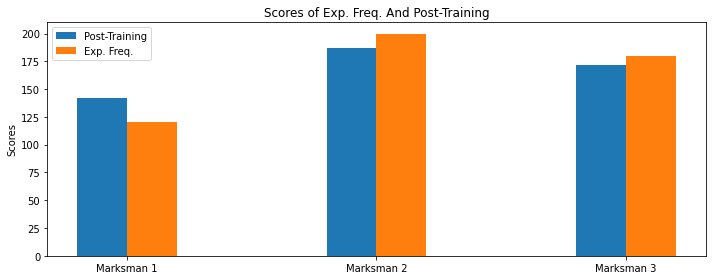

In [18]:
labels = ['Marksman 1', 'Marksman 2', 'Marksman 3']
post_training = np.array([142, 187, 172])
exp_frequency = np.array([120, 200, 180])

x = np.arange(len(labels))  # the label locations
width = .2  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 4))
rects1 = ax.bar(x - width/2, post_training, width, label='Post-Training')
rects2 = ax.bar(x + width/2, exp_frequency, width, label='Exp. Freq.')

ax.set_ylabel('Scores')
ax.set_title('Scores of Exp. Freq. And Post-Training')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

If the expected and observed frequencies differ significantly, we would conclude a rejection to the null hypothesis. The test statistic is 
$$
\chi^2=\sum_{i=1}^k\frac{(f_i-e_i)^2}{e_i}
$$
where $f_i$ and $e_i$ are observed and expected frequencies. In this example, $\chi^2$ is
$$
\chi^2 = \frac{(f_1-e_1)^2}{e_1}+\frac{(f_2-e_2)^2}{e_2}+\frac{(f_3-e_3)^2}{e_3}
$$

Compute the $\chi^2$

In [19]:
sum((post_training - exp_frequency)**2/exp_frequency)

5.233888888888888

Degree of freedom is $\nu=k-1=2$, therefore the rejection region is 
$$
\chi^2>\chi^2_{.05, 2}
$$
which can be found by ```stats.chi2.ppf```.

In [20]:
stats.chi2.ppf(.95, 2)

5.991464547107979

Because $\chi^2$-statistic did not surpass the critical value, we conclude a fail to rejection of null hypothesis. That means even though the post-traning result is better than expectation, it's likely to be a statistical fluke rather than evidence of skill improvement.